<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Make-a-copy-of-the-source-Slides-deck" data-toc-modified-id="Make-a-copy-of-the-source-Slides-deck-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Make a copy of the source Slides deck</a></span></li><li><span><a href="#Examining-existing-slide-objects" data-toc-modified-id="Examining-existing-slide-objects-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examining existing slide objects</a></span></li><li><span><a href="#Replacing-content" data-toc-modified-id="Replacing-content-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Replacing content</a></span><ul class="toc-item"><li><span><a href="#Replacing-text" data-toc-modified-id="Replacing-text-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Replacing text</a></span></li><li><span><a href="#Replacing-images" data-toc-modified-id="Replacing-images-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Replacing images</a></span><ul class="toc-item"><li><span><a href="#Option-1:-using-integer-keys" data-toc-modified-id="Option-1:-using-integer-keys-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Option 1: using integer keys</a></span></li><li><span><a href="#Option-2:-using-object-ID-(string)-keys" data-toc-modified-id="Option-2:-using-object-ID-(string)-keys-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Option 2: using object ID (string) keys</a></span></li></ul></li></ul></li><li><span><a href="#Upload-figure-to-Drive" data-toc-modified-id="Upload-figure-to-Drive-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Upload figure to Drive</a></span></li></ul></div>

## Setup

This notebook demonstates the use of GoogleSlidesManager class, which can help update content in a Slides deck from a Jupyter Notebook including replacing figures and text content.

In [1]:
# functions for referencing most recent code
%load_ext autoreload
%autoreload 2

# add pulse-data to path
import sys
sys.path.append("../../../")

# import GoogleSlidesManager
from slides import GoogleSlidesManager

Initialize a GoogleSlidesManager object. You'll need to specify:
1. `credentials_path`: local path to your credentials.json file to allow editing Google Drive files. Download this from https://console.developers.google.com/apis/credentials
2. `slides_id`: Google Drive-provided ID for the Google Slides presentation you want to manage, which can be found in the presentation's URL

In [2]:
# provide a path to your credentials.json file 
CREDENTIALS_PATH = '/Users/zack/Downloads/' 

# get this from the URL of the source Slides deck
SLIDES_ID = '1VH2uoIbcqPldYtaSSff93of47TFXZ13uNn0N6sKQ6z0'

# initialize the class object
manager = GoogleSlidesManager(
    credentials_path = CREDENTIALS_PATH, 
    slides_id = SLIDES_ID,
)

manager


Managing this presentation:
https://docs.google.com/presentation/d/1VH2uoIbcqPldYtaSSff93of47TFXZ13uNn0N6sKQ6z0

in this folder:
https://drive.google.com/drive/folders/1Ttjlrn-Kk4cYLkzFl5e2-M1dSlfdZXAP



## Make a copy of the source Slides deck

Use this method in case you want to make a copy of the Slides deck (as opposed to editing it directly). This is useful if you have a template (e.g. State of the State) and want to make copies for each state.

In [3]:
# set function parameters:

# name of the new Slides name
NEW_SLIDES_NAME = "Zack's copy of template"

# name of the parent directory where the new copy will live
PARENT_DIRECTORY_ID = "1MWEmESOsgKdMD8TteybDehso00aBXCvP"

# Optional: name of a new folder to place the new copy
# If None, then places copy in specified parent directory
NEW_DIRECTORY_NAME = None
NEW_DIRECTORY_NAME = "Zack's folder"


# copy the template
manager.copy_slides(
    new_slides_name = NEW_SLIDES_NAME,
    parent_directory_id = PARENT_DIRECTORY_ID,
    new_directory_name = NEW_DIRECTORY_NAME,
    keep_managing_template = False
)

Created directory Zack's folder.

Copied template as Zack's copy of template at this address:
https://docs.google.com/presentation/d/1hs-Ouplp-j1bNJXD1fHx5ytMvxrW7xIen_vLx1_freY

in this folder:
https://drive.google.com/drive/folders/1FuKBp5kYMJR2PBmtikshKnCU3a4y3ucY
            


## Examining existing slide objects

Use these methods to examine objects currently in the managed Slides deck:
- `get_image_objects`: for a provided set of slide numbers, returns any image objects found.

In [4]:
image_objects = manager.get_image_objects(
    slide_numbers = [1, 3, 4]
)

print(image_objects)

# Notice a warning for slide 4, which doesn't exist.    

Cannot access slide 4. Verify that the slide exists.


{1: [], 3: ['ge2e01250d9_1_0', 'ge4c70a8c53_0_1']}


## Replacing content

Using `update_slides`, one can replace text and upload images.

### Replacing text

Set a dictionary like:
```
text_replace_dict = {
    "old_title": "new_title",
}
```
and the method will replace all exact matches of the dictionary keys with the associated values. Case sensitive!

You can include a list of `slide_numbers` to restrict where the search occurs.

In [5]:
# set params
SLIDE_NUMBERS = [1, 2]
TEXT_REPLACE_DICT = {
    "{{graph1_title}}": "This is the first graph",
    "{{graph2_title}}": "This is the second graph",
}

# update the slide text
manager.update_slides(
    slide_numbers = SLIDE_NUMBERS,
    text_replace_dict = TEXT_REPLACE_DICT,
)

# observe that {{graph2_title}} was NOT replaced since it's on slide 3
# and slide_numbers does not include slide 3.

Google Slides deck updated!


###  Replacing images

You can replace images using `update_slides`. First, create a graph and save it locally (somewhere easy to find).

File saved: /Users/zack/Downloads/figure1.png


<Figure size 576x432 with 0 Axes>

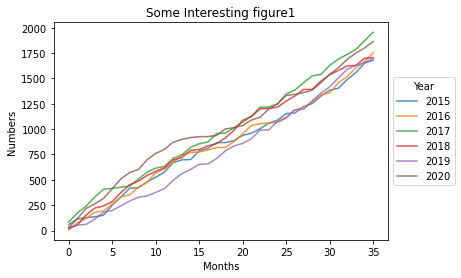

File saved: /Users/zack/Downloads/figure2.png


<Figure size 576x432 with 0 Axes>

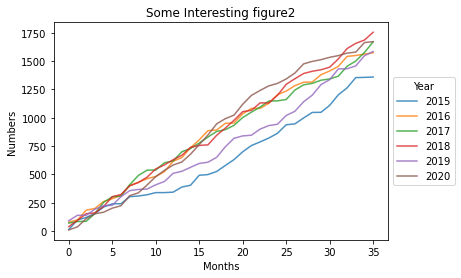

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def make_random_graph(graph_name: str,
                     file_path:str) -> None:
    """
    Plots random graph and saves file_path/graph_name.png.
    """
    # make sure path ends with /
    if file_path[-1] != '/':
        file_path += '/'        
    
    df = pd.DataFrame(np.random.randint(0,100,size=(36,6)), 
                      columns=range(2015,2021)).cumsum()
    fig = plt.figure(figsize=(8,6))
    ax = df.plot(alpha = .8)

    ax.set_title('Some Interesting ' + graph_name)
    ax.set_ylabel('Numbers')
    ax.set_xlabel('Months')
    ax.legend(loc='center left', 
                       bbox_to_anchor=(1, 0.5),
                       title = 'Year')
    file_name = file_path + graph_name + '.png'
    plt.savefig(file_name, bbox_inches = 'tight')
    print(f"File saved: {file_name}")
    plt.show()

make_random_graph(graph_name='figure1',
                  file_path='/Users/zack/Downloads')
make_random_graph(graph_name='figure2',
                  file_path='/Users/zack/Downloads')

#### Option 1: using integer keys

Then, you can replace images using `figure_replace_dict`. The keys in this dictionary correspond with the order of images as they appear in `slide_numbers` (starting with 0).

In [7]:
# set params
SLIDE_NUMBERS = [1, 2]
path = "/Users/zack/Downloads/"
FIGURE_REPLACE_DICT = {
    0: path + "figure1.png",
}

# update the slide figures
manager.update_slides(
    slide_numbers = SLIDE_NUMBERS,
    figure_replace_dict = FIGURE_REPLACE_DICT,
)

# Notice that in slides 1-2, there is only one figure,
# which is replaced with figure1.png.

Uploaded figure figure1.png
Google Slides deck updated!
All uploaded figures deleted.


In [8]:
# set params
SLIDE_NUMBERS = [1]
path = "/Users/zack/Downloads/"
FIGURE_REPLACE_DICT = {
    0: path + "figure2.png",
}

# update the slide figures
manager.update_slides(
    slide_numbers = SLIDE_NUMBERS,
    figure_replace_dict = FIGURE_REPLACE_DICT,
)

# Notice that in slide 1, there is no figure,
# so an error is raised.

ValueError: Cannot find image with key: 0. Verify that it exists.

#### Option 2: using object ID (string) keys

Alternatively, you can use the object IDs for the Slide image as the keys in `figure_replace_dict`. Finding these objects IDs is easy using `get_image_objects`. This may be preferrable since the object ID will remain constant in the Slides deck even if the order of images changes.

In [9]:
# get image object IDs in the slide range provided
print(manager.get_image_objects(slide_numbers=[2]))

# There's only one image_id, so let's replace that:
FIGURE_REPLACE_DICT = {
    'ge4c70a8c53_0_0': path + "figure2.png",
}

# replace the provided images
manager.update_slides(
    figure_replace_dict = FIGURE_REPLACE_DICT,
)

{2: ['ge4c70a8c53_0_0']}
Uploaded figure figure2.png
Google Slides deck updated!
All uploaded figures deleted.


## Upload figure to Drive

Maybe you don't want to upload a figure directly to a presentation, but instead want to upload a figure to a Drive folder. Use `manager.upload_figure()`.

In [10]:
manager.upload_figure(path + "figure1.png")

Uploaded figure figure1.png


('1ycAvWpr89Nql2h9PCCzx9asHltZglJwu',
 'https://drive.google.com/uc?id=1ycAvWpr89Nql2h9PCCzx9asHltZglJwu&export=download')

If you want to upload to a different folder, provide the Drive folder ID using parameter `parent_directory_id`:

In [11]:
folder_id = "1Ttjlrn-Kk4cYLkzFl5e2-M1dSlfdZXAP"

manager.upload_figure(path + "figure1.png",
                      parent_directory_id=folder_id)


Uploaded figure1.png to this folder:
https://drive.google.com/drive/folders/1Ttjlrn-Kk4cYLkzFl5e2-M1dSlfdZXAP
                


('14Lwes224_9Sz-nPOGtwXCM1GIZA9DJk_',
 'https://drive.google.com/uc?id=14Lwes224_9Sz-nPOGtwXCM1GIZA9DJk_&export=download')